## Problem Statement

Group different animals into clusters based on the attribute dataset.  

#### Data Source
http://attributes.kyb.tuebingen.mpg.de/

#### Good Resource
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
%cd /Users/cjstev/Documents/DSE/c1steven/DSE210/HW4/Animals_with_Attributes

/Users/cjstev/Documents/DSE/c1steven/DSE210/HW4/Animals_with_Attributes


In [2]:
!ls

Features                        predicate-matrix-continuous.txt
README-attributes.txt           predicate-matrix.png
classes.txt                     predicates.txt
lampert-cvpr2009.pdf            testclasses.txt
predicate-matrix-binary.txt     trainclasses.txt


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams
import pandas as pd
import numpy as np
import sklearn.cluster as clst
import sklearn

In [4]:
myarray = np.fromfile('predicate-matrix-continuous.txt',sep=' ')
myarray = myarray.reshape((50,85))
predicates = pd.read_csv('predicates.txt',sep='\t',skipinitialspace=True,names = ['column','attribute'])
animaldata = pd.read_csv('predicate-matrix-continuous.txt',sep=' ',skipinitialspace=True,names = list(predicates.attribute))
mynames = pd.read_csv('classes.txt',sep='\t',skipinitialspace=True,names=['AnimalID','AnimalName'])

In [13]:
k=10
np.random.seed(10)
myclst = clst.KMeans(k)
myfit = myclst.fit(myarray)
mypreds = myfit.predict(myarray)

In [15]:
for i in range(k):
    print 'Cluster {} has the following animals:'.format(i)
    print ','.join(list(mynames[mypreds==i].AnimalName))
    print ''

Cluster 0 has the following animals:
dalmatian,persian+cat,siamese+cat,chihuahua,weasel,collie

Cluster 1 has the following animals:
hippopotamus,elephant,ox,sheep,rhinoceros,buffalo,giant+panda,pig,cow

Cluster 2 has the following animals:
beaver,seal,otter,dolphin

Cluster 3 has the following animals:
german+shepherd,tiger,leopard,fox,wolf,bobcat,lion

Cluster 4 has the following animals:
spider+monkey,gorilla,chimpanzee

Cluster 5 has the following animals:
grizzly+bear,polar+bear

Cluster 6 has the following animals:
killer+whale,blue+whale,humpback+whale,walrus

Cluster 7 has the following animals:
antelope,horse,moose,giraffe,zebra,deer

Cluster 8 has the following animals:
bat

Cluster 9 has the following animals:
skunk,mole,hamster,squirrel,rabbit,rat,mouse,raccoon



This clustering makes sense.  Bears are grouped together, sea creatures are in 2 groups, etc.

In [7]:
import scipy.cluster.hierarchy as h

In [8]:
myhier = h.linkage(myarray,method='ward')

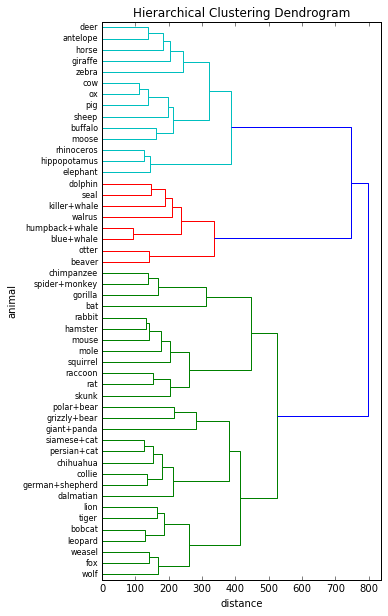

In [17]:
plt.figure(figsize=(5, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('animal')
dendrogram(
    myhier,
    orientation='right',
    labels = list(mynames.AnimalName)
)
plt.show()

Again, this makes sense as the animals next to each other are usually similar.

## Worksheet 8

In [19]:
from sklearn.decomposition import PCA

In [63]:
mytranspose = np.transpose(myarray)

In [66]:
mypca = PCA()
mypca = mypca.fit_transform(mytranspose)

In [71]:
top2 = np.transpose(mypca)[:2]

In [75]:
my2dproj = np.dot(top2,mytranspose)

In [84]:
x,y,text = my2dproj[0],my2dproj[1],list(mynames.AnimalName)

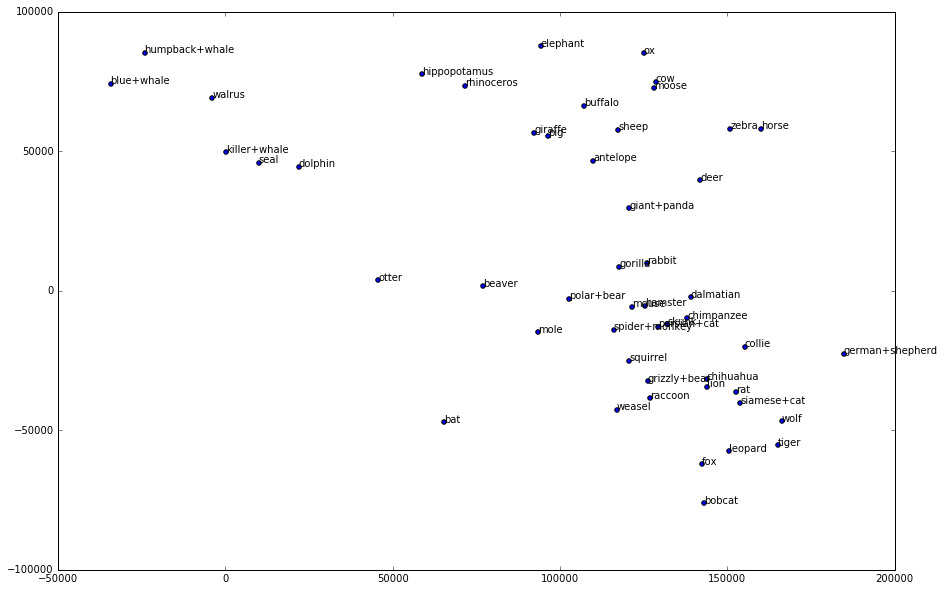

In [91]:
rcParams['figure.figsize'] = 15,10
fig, ax = plt.subplots()

ax.scatter(x, y)

for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

This 2 dimensional clustering shows the euclidian distance for the first two PCA projections of the data.